## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0   8.189807   746.906455  0.720572  9.551448  538.432461
1  73.685408  1389.211887  0.403876  3.201847  565.803920
2  38.993020   752.189678  0.243043  4.193464  186.923843
3  82.958556  1590.803065  0.462401  9.224446  740.294259
4  10.524274  1592.941446  0.469736  5.542267  748.502458


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0001426	total: 55.7ms	remaining: 55.6s
1:	learn: 0.9866971	total: 56.1ms	remaining: 28s
2:	learn: 0.9761801	total: 56.5ms	remaining: 18.8s
3:	learn: 0.9638375	total: 57ms	remaining: 14.2s
4:	learn: 0.9519807	total: 57.5ms	remaining: 11.4s
5:	learn: 0.9418809	total: 57.8ms	remaining: 9.58s
6:	learn: 0.9278791	total: 58.3ms	remaining: 8.27s
7:	learn: 0.9152920	total: 58.8ms	remaining: 7.29s
8:	learn: 0.9014176	total: 59.2ms	remaining: 6.52s
9:	learn: 0.8883153	total: 59.6ms	remaining: 5.9s
10:	learn: 0.8764695	total: 60.6ms	remaining: 5.45s
11:	learn: 0.8618981	total: 61ms	remaining: 5.03s
12:	learn: 0.8484030	total: 61.6ms	remaining: 4.67s
13:	learn: 0.8375106	total: 62ms	remaining: 4.37s
14:	learn: 0.8253983	total: 62.4ms	remaining: 4.1s
15:	learn: 0.8159061	total: 62.9ms	remaining: 3.87s
16:	learn: 0.8059367	total: 63.4ms	remaining: 3.67s
17:	learn: 0.7963941	total: 63.9ms	remaining: 3.48s
18:	learn: 0.7885535	total: 64.5ms	remaining: 3.33s
19

103:	learn: 0.2937993	total: 106ms	remaining: 909ms
104:	learn: 0.2914578	total: 106ms	remaining: 905ms
105:	learn: 0.2888448	total: 107ms	remaining: 899ms
106:	learn: 0.2854399	total: 107ms	remaining: 893ms
107:	learn: 0.2824280	total: 108ms	remaining: 888ms
108:	learn: 0.2795981	total: 108ms	remaining: 883ms
109:	learn: 0.2767563	total: 108ms	remaining: 877ms
110:	learn: 0.2740421	total: 109ms	remaining: 872ms
111:	learn: 0.2714740	total: 109ms	remaining: 866ms
112:	learn: 0.2687801	total: 110ms	remaining: 861ms
113:	learn: 0.2660492	total: 110ms	remaining: 857ms
114:	learn: 0.2637404	total: 111ms	remaining: 853ms
115:	learn: 0.2612986	total: 111ms	remaining: 849ms
116:	learn: 0.2588688	total: 112ms	remaining: 844ms
117:	learn: 0.2566672	total: 112ms	remaining: 838ms
118:	learn: 0.2542469	total: 113ms	remaining: 833ms
119:	learn: 0.2521573	total: 113ms	remaining: 828ms
120:	learn: 0.2490007	total: 114ms	remaining: 828ms
121:	learn: 0.2468026	total: 114ms	remaining: 823ms
122:	learn: 

281:	learn: 0.0787552	total: 187ms	remaining: 476ms
282:	learn: 0.0783319	total: 187ms	remaining: 474ms
283:	learn: 0.0778513	total: 188ms	remaining: 473ms
284:	learn: 0.0775889	total: 188ms	remaining: 472ms
285:	learn: 0.0771257	total: 189ms	remaining: 471ms
286:	learn: 0.0765662	total: 189ms	remaining: 469ms
287:	learn: 0.0761851	total: 189ms	remaining: 468ms
288:	learn: 0.0756577	total: 190ms	remaining: 466ms
289:	learn: 0.0752610	total: 190ms	remaining: 465ms
290:	learn: 0.0746703	total: 190ms	remaining: 464ms
291:	learn: 0.0741462	total: 191ms	remaining: 463ms
292:	learn: 0.0736550	total: 191ms	remaining: 461ms
293:	learn: 0.0733431	total: 192ms	remaining: 460ms
294:	learn: 0.0730416	total: 192ms	remaining: 459ms
295:	learn: 0.0724914	total: 192ms	remaining: 457ms
296:	learn: 0.0721686	total: 193ms	remaining: 456ms
297:	learn: 0.0718274	total: 193ms	remaining: 455ms
298:	learn: 0.0714714	total: 194ms	remaining: 454ms
299:	learn: 0.0711709	total: 194ms	remaining: 453ms
300:	learn: 

506:	learn: 0.0296817	total: 287ms	remaining: 279ms
507:	learn: 0.0294794	total: 288ms	remaining: 278ms
508:	learn: 0.0293676	total: 288ms	remaining: 278ms
509:	learn: 0.0291825	total: 288ms	remaining: 277ms
510:	learn: 0.0290732	total: 289ms	remaining: 276ms
511:	learn: 0.0289014	total: 289ms	remaining: 276ms
512:	learn: 0.0287543	total: 290ms	remaining: 275ms
513:	learn: 0.0286328	total: 290ms	remaining: 274ms
514:	learn: 0.0285337	total: 290ms	remaining: 274ms
515:	learn: 0.0283693	total: 291ms	remaining: 273ms
516:	learn: 0.0282290	total: 291ms	remaining: 272ms
517:	learn: 0.0280777	total: 292ms	remaining: 272ms
518:	learn: 0.0279008	total: 292ms	remaining: 271ms
519:	learn: 0.0278050	total: 293ms	remaining: 270ms
520:	learn: 0.0277049	total: 293ms	remaining: 270ms
521:	learn: 0.0275588	total: 294ms	remaining: 269ms
522:	learn: 0.0274017	total: 294ms	remaining: 268ms
523:	learn: 0.0272695	total: 294ms	remaining: 267ms
524:	learn: 0.0271239	total: 295ms	remaining: 267ms
525:	learn: 

684:	learn: 0.0135499	total: 368ms	remaining: 169ms
685:	learn: 0.0135103	total: 369ms	remaining: 169ms
686:	learn: 0.0134614	total: 369ms	remaining: 168ms
687:	learn: 0.0133996	total: 370ms	remaining: 168ms
688:	learn: 0.0133609	total: 370ms	remaining: 167ms
689:	learn: 0.0133252	total: 371ms	remaining: 167ms
690:	learn: 0.0132782	total: 371ms	remaining: 166ms
691:	learn: 0.0132406	total: 372ms	remaining: 165ms
692:	learn: 0.0131920	total: 372ms	remaining: 165ms
693:	learn: 0.0131574	total: 373ms	remaining: 164ms
694:	learn: 0.0131197	total: 373ms	remaining: 164ms
695:	learn: 0.0130744	total: 373ms	remaining: 163ms
696:	learn: 0.0130302	total: 374ms	remaining: 163ms
697:	learn: 0.0129946	total: 375ms	remaining: 162ms
698:	learn: 0.0129542	total: 375ms	remaining: 161ms
699:	learn: 0.0129209	total: 375ms	remaining: 161ms
700:	learn: 0.0128783	total: 376ms	remaining: 160ms
701:	learn: 0.0128288	total: 376ms	remaining: 160ms
702:	learn: 0.0127965	total: 377ms	remaining: 159ms
703:	learn: 

886:	learn: 0.0071829	total: 470ms	remaining: 59.8ms
887:	learn: 0.0071660	total: 470ms	remaining: 59.3ms
888:	learn: 0.0071478	total: 471ms	remaining: 58.8ms
889:	learn: 0.0071316	total: 471ms	remaining: 58.2ms
890:	learn: 0.0071093	total: 472ms	remaining: 57.7ms
891:	learn: 0.0070798	total: 472ms	remaining: 57.1ms
892:	learn: 0.0070446	total: 472ms	remaining: 56.6ms
893:	learn: 0.0070282	total: 473ms	remaining: 56.1ms
894:	learn: 0.0070120	total: 473ms	remaining: 55.5ms
895:	learn: 0.0069999	total: 474ms	remaining: 55ms
896:	learn: 0.0069880	total: 474ms	remaining: 54.5ms
897:	learn: 0.0069535	total: 475ms	remaining: 53.9ms
898:	learn: 0.0069337	total: 475ms	remaining: 53.4ms
899:	learn: 0.0069088	total: 476ms	remaining: 52.8ms
900:	learn: 0.0068932	total: 476ms	remaining: 52.3ms
901:	learn: 0.0068688	total: 477ms	remaining: 51.8ms
902:	learn: 0.0068535	total: 477ms	remaining: 51.2ms
903:	learn: 0.0068384	total: 477ms	remaining: 50.7ms
904:	learn: 0.0068189	total: 478ms	remaining: 50

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

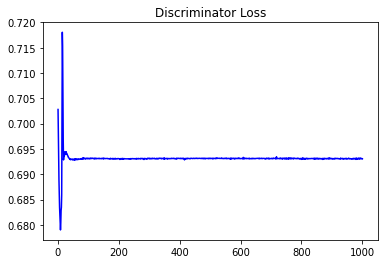

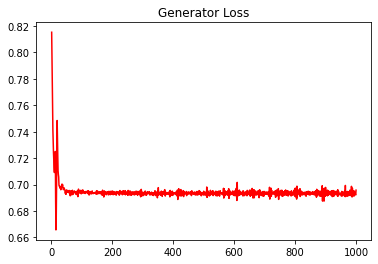

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.025044365046064873


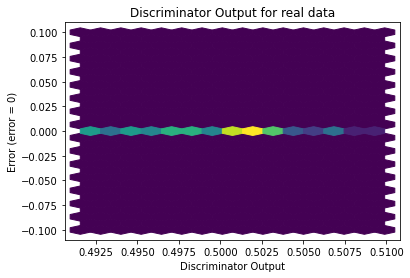

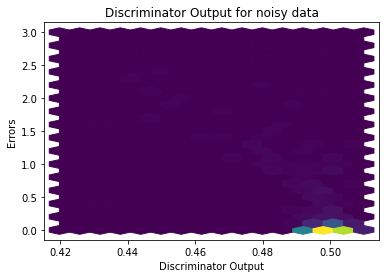

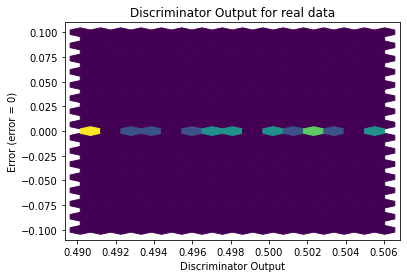

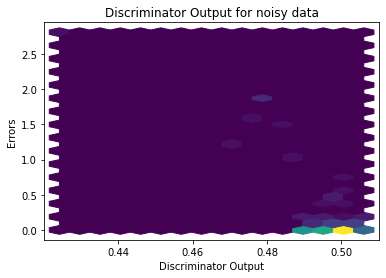

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


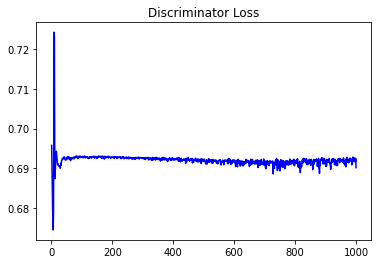

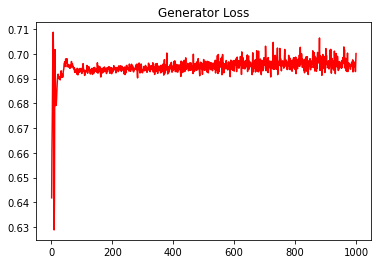

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03803679485559901


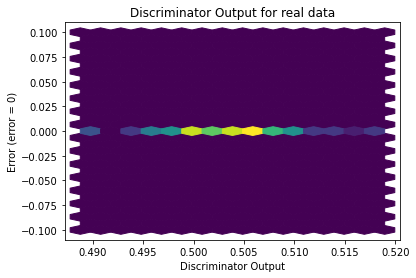

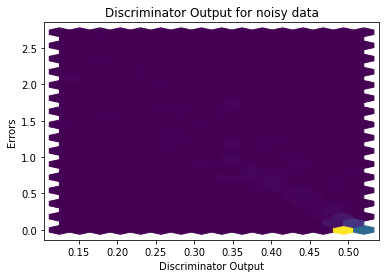

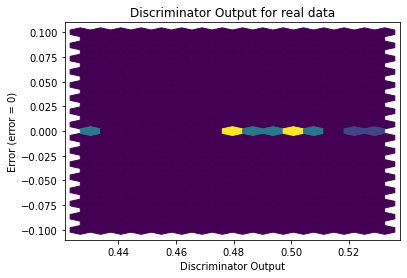

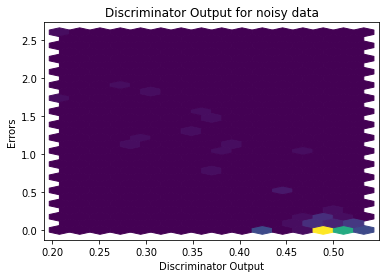

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1554]], requires_grad=True)
